In [1]:
import numpy as np
import pandas as pd

from dataset import get_dataset
from trainer import Trainer
from inference import create_label, sum_label
from loss import LabelSmoothing

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models

In [13]:
## hyperparameters

model_name = 'efficientnet-b0'
batch_size = 64
lr = 0.00006
num_epoch = 30
target = 'label'

df_train_path = 'df/df_mask_gender_train.csv'
df_valid_path = 'df/df_mask_gender_valid.csv'
df_test_path = '/opt/ml/input/data/eval/info.csv'

In [3]:
## prepare dataset

df_train = pd.read_csv(df_train_path)
df_valid = pd.read_csv(df_valid_path)
df_test = pd.read_csv(df_test_path)

train_dataset, valid_dataset, test_dataset = get_dataset(df_train, df_valid, df_test, target=target)

In [4]:
## prepare sampler

from torch.utils.data.sampler import WeightedRandomSampler

target = train_dataset.target
weight = df_train[target].value_counts().sort_index().to_numpy()
print('count :', weight)
weight = 1. / weight
samples_weight = np.array([weight[t] for t in df_train[target]])
samples_weight = torch.from_numpy(samples_weight)
sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight)//2)

count : [3905 6220  781 1244  781 1244]


In [5]:
## prepare Dataloader

dataloaders = {'train' : DataLoader(train_dataset, batch_size=batch_size, num_workers=3, drop_last=True, sampler=sampler),
               'valid' : DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)}
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)

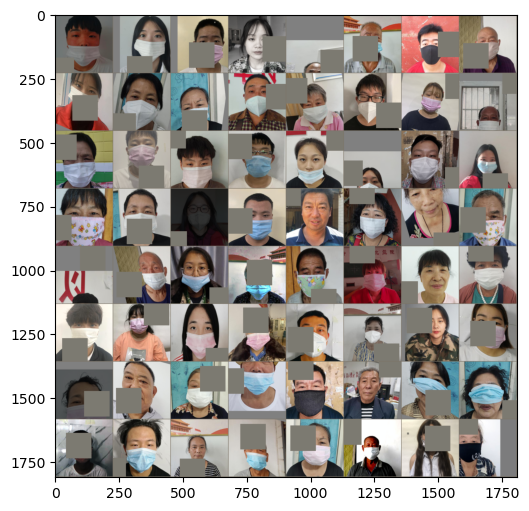

tensor([2, 1, 0, 5, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1,
        1, 0, 1, 0, 4, 1, 5, 0, 0, 0, 3, 1, 0, 1, 5, 1, 0, 1, 1, 1, 0, 1, 5, 1,
        1, 4, 1, 2, 0, 4, 3, 3, 0, 0, 5, 0, 1, 0, 3, 1])


In [17]:
# check input train batch

from utils import imshow
batch = next(iter(dataloaders['train']))
imshow(batch[0])
print(batch[1])

In [6]:
## prepare model

device = 'cuda'

if model_name.startswith('efficientnet'):
    from efficientnet_pytorch import EfficientNet
    model = EfficientNet.from_pretrained(model_name, num_classes=len(train_dataset.classes))
else:
    model = models.resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))
    
model.to(device)

criterion = LabelSmoothing(0.05)
optimizer = optim.Adam(model.parameters(), lr=lr)

Loaded pretrained weights for efficientnet-b0


## Train

In [7]:
trainer = Trainer('/opt/ml/code/save')

In [13]:
## resume
# model.load_state_dict(torch.load('/opt/ml/code/save/label/effnet_test018.pt'))

# # change lr manually:
# for g in optimizer.param_groups:
#     g['lr'] = 0.00001

In [8]:
trainer.train(model, dataloaders, criterion, optimizer, device, num_epochs=num_epoch, scheduler=None, save_name='mask_gender')

Epoch 1/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.61it/s]


train Loss: 1.2653 Acc: 0.6134 F1: 0.6112888626133133


100%|██████████| 74/74 [00:09<00:00,  7.51it/s]


valid Loss: 0.6506 Acc: 0.8290 F1: 0.8269930069478466

Epoch 2/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.55it/s]


train Loss: 0.5917 Acc: 0.8692 F1: 0.86844611633809


100%|██████████| 74/74 [00:09<00:00,  7.54it/s]


valid Loss: 0.4250 Acc: 0.9359 F1: 0.9291359625634481

Epoch 3/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.55it/s]


train Loss: 0.4737 Acc: 0.9107 F1: 0.91013157395096


100%|██████████| 74/74 [00:09<00:00,  7.42it/s]


valid Loss: 0.3705 Acc: 0.9572 F1: 0.9533195553781907

Epoch 4/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.56it/s]


train Loss: 0.4291 Acc: 0.9253 F1: 0.925211090794558


100%|██████████| 74/74 [00:09<00:00,  7.42it/s]


valid Loss: 0.3463 Acc: 0.9649 F1: 0.9623026774885383

Epoch 5/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.56it/s]


train Loss: 0.4186 Acc: 0.9294 F1: 0.929059306973612


100%|██████████| 74/74 [00:09<00:00,  7.53it/s]


valid Loss: 0.3403 Acc: 0.9649 F1: 0.9619245450172486

Epoch 6/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.47it/s]


train Loss: 0.3946 Acc: 0.9368 F1: 0.936752734163894


100%|██████████| 74/74 [00:09<00:00,  7.45it/s]


valid Loss: 0.3331 Acc: 0.9676 F1: 0.962968389824444

Epoch 7/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.50it/s]


train Loss: 0.3832 Acc: 0.9416 F1: 0.9414902059938967


100%|██████████| 74/74 [00:09<00:00,  7.46it/s]


valid Loss: 0.3345 Acc: 0.9687 F1: 0.9668456311736894

Epoch 8/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.54it/s]


train Loss: 0.3880 Acc: 0.9428 F1: 0.9426630963385317


100%|██████████| 74/74 [00:09<00:00,  7.41it/s]


valid Loss: 0.3322 Acc: 0.9691 F1: 0.9658838313137679

Epoch 9/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.57it/s]


train Loss: 0.3682 Acc: 0.9480 F1: 0.9480549263949266


100%|██████████| 74/74 [00:09<00:00,  7.41it/s]


valid Loss: 0.3288 Acc: 0.9716 F1: 0.9702247875752598

Epoch 10/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.52it/s]


train Loss: 0.3683 Acc: 0.9483 F1: 0.9483682685036815


100%|██████████| 74/74 [00:10<00:00,  7.30it/s]


valid Loss: 0.3238 Acc: 0.9729 F1: 0.9707649205074654

Epoch 11/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.52it/s]


train Loss: 0.3521 Acc: 0.9553 F1: 0.9551825502958126


100%|██████████| 74/74 [00:10<00:00,  7.36it/s]


valid Loss: 0.3198 Acc: 0.9719 F1: 0.9710555753514566

Epoch 12/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.56it/s]


train Loss: 0.3565 Acc: 0.9496 F1: 0.9496754225303082


100%|██████████| 74/74 [00:09<00:00,  7.47it/s]


valid Loss: 0.3253 Acc: 0.9742 F1: 0.9716473830867866

Epoch 13/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.49it/s]


train Loss: 0.3529 Acc: 0.9550 F1: 0.954774955804258


100%|██████████| 74/74 [00:09<00:00,  7.42it/s]


valid Loss: 0.3221 Acc: 0.9738 F1: 0.9726329129204835

Epoch 14/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.57it/s]


train Loss: 0.3474 Acc: 0.9561 F1: 0.9563061453456337


100%|██████████| 74/74 [00:09<00:00,  7.50it/s]


valid Loss: 0.3196 Acc: 0.9767 F1: 0.9767540684742344

Epoch 15/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.56it/s]


train Loss: 0.3491 Acc: 0.9545 F1: 0.9545714331321382


100%|██████████| 74/74 [00:09<00:00,  7.53it/s]


valid Loss: 0.3205 Acc: 0.9733 F1: 0.9756615449133212

Epoch 16/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.58it/s]


train Loss: 0.3402 Acc: 0.9609 F1: 0.9609874712451575


100%|██████████| 74/74 [00:09<00:00,  7.43it/s]


valid Loss: 0.3188 Acc: 0.9725 F1: 0.9724370820951868

Epoch 17/30
----------


100%|██████████| 110/110 [00:30<00:00,  3.56it/s]


train Loss: 0.3310 Acc: 0.9625 F1: 0.9624742563491155


100%|██████████| 74/74 [00:09<00:00,  7.50it/s]


valid Loss: 0.3243 Acc: 0.9719 F1: 0.968048535480325

Epoch 18/30
----------


100%|██████████| 110/110 [00:31<00:00,  3.54it/s]


train Loss: 0.3402 Acc: 0.9589 F1: 0.9589650830462139


100%|██████████| 74/74 [00:09<00:00,  7.50it/s]


valid Loss: 0.3124 Acc: 0.9769 F1: 0.974704595300404

Epoch 19/30
----------


 22%|██▏       | 24/110 [00:07<00:26,  3.29it/s]


KeyboardInterrupt: 

## Experiment Logs

---

1. eff b0, lr=0.00006, bs=64, randaug+cutout, inputsize=224, loss_fn=CE, WeightedSampler, age >=58
  * epoch 18)
    - train Loss: 0.0991 Acc: 0.9655 F1: 0.9654261306812848
    - valid Loss: 0.0980 Acc: 0.9778 F1: 0.9772288369633227  
  * before first patience

---

2. eff b0, lr=0.00006, bs=64, randaug+cutout, inputsize=224, loss_fn=LS(0.05), WeightedSampler, age >=58
  * epoch 21)
    - train Loss: 0.3310 Acc: 0.9638 F1: 0.963728513759618
    - valid Loss: 0.3071 Acc: 0.9786 F1: 0.9791634664746235 

---

3. eff b0, lr=0.00006, bs=64, randaug+cutout, inputsize=224, loss_fn=F1_Loss, age >=58
  * epoch 13)
    - train Loss: 0.0710 Acc: 0.9584 F1: 0.9476713834498373
    - valid Loss: 0.0403 Acc: 0.9765 F1: 0.9748789208889367
  * epoch 3)
    - train Loss: 0.0594 Acc: 0.9655 F1: 0.9555452013464937
    - valid Loss: 0.0369 Acc: 0.9782 F1: 0.9776768545260203



## Debug

In [11]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

model.eval()
y_true = []
y_pred = []
wrong = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(preds.tolist())
        
        for p, t, inp in zip(preds, labels, inputs):
            if p.item() != t.item():
                wrong.append((inp.cpu().numpy(), p.item(), t.item()))

mtx = confusion_matrix(y_true, y_pred)
print(mtx)


[[1233   72    0    0    0    0]
 [  16 2052    0    2    0    0]
 [   0    0  245   16    0    0]
 [   0    3    4  407    0    0]
 [   0    0    0    0  252    9]
 [   0    0    0    0    4  410]]


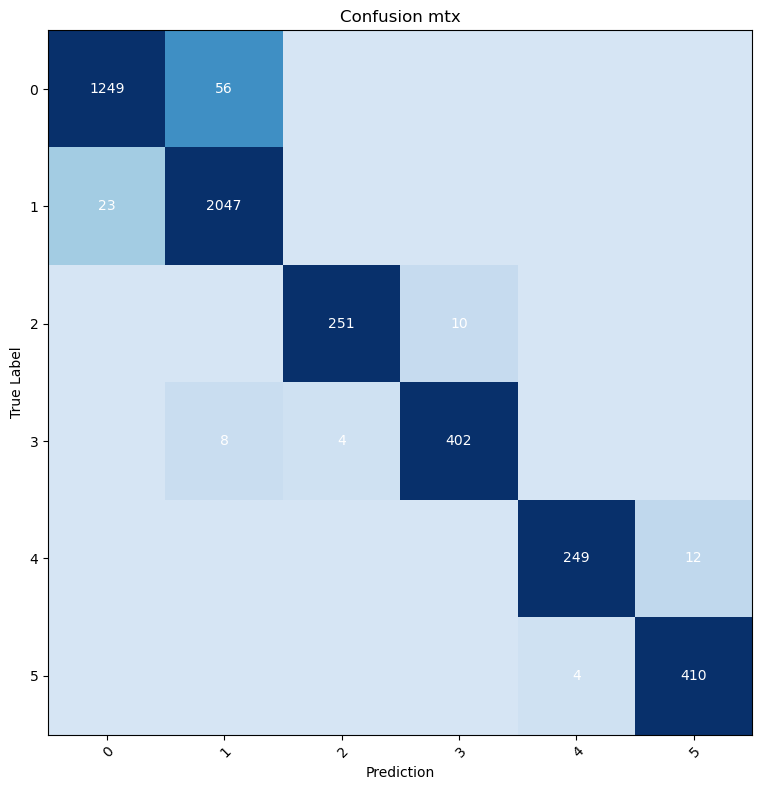

In [19]:
import matplotlib.pyplot as plt

label_ = list(range(6))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(mtx, cmap='Blues', vmax=100, vmin=-20)

ax.set_xticks(np.arange(len(label_)))
ax.set_yticks(np.arange(len(label_)))
# ... and label them with the respective list entries
ax.set_xticklabels(label_)
ax.set_yticklabels(label_)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(label_)):
    for j in range(len(label_)):
        if mtx[i, j]:
            text = ax.text(j, i, mtx[i, j],
                           ha="center", va="center", color="w", size=10)
ax.set_xlabel('Prediction')
ax.set_ylabel('True Label')
ax.set_title("Confusion mtx")
fig.tight_layout()
plt.show()

In [32]:
import matplotlib.pyplot as plt
iterator = iter(wrong)

label = ["Male with mask", "Female with Mask", "Male incorrect mask", "Female no mask", "Male incorrect mask", "Female no mask"]
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

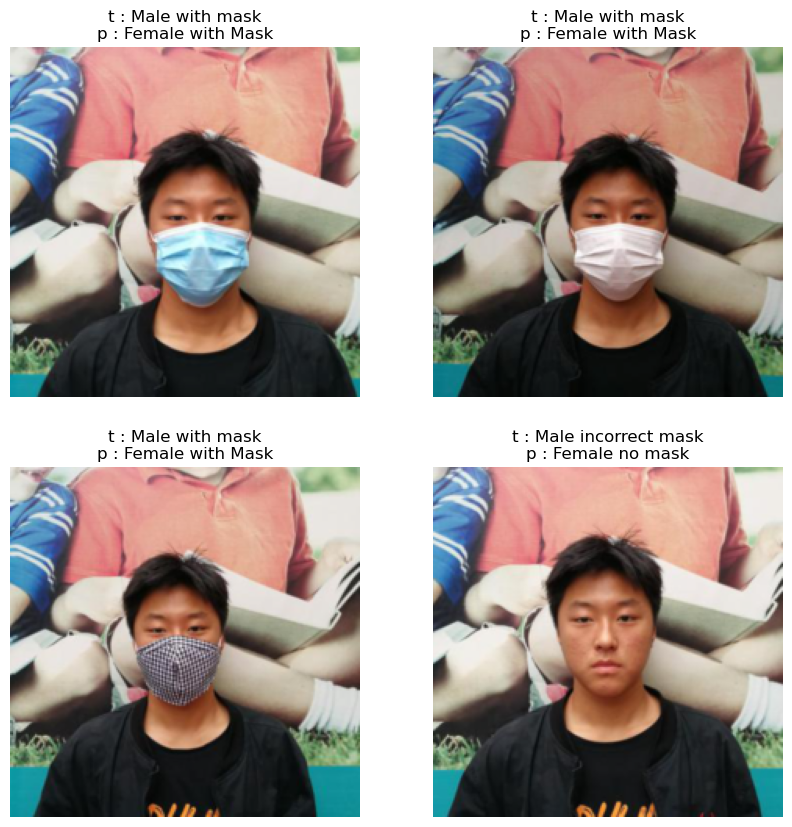

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
for ax in axes.flatten():
    img, p, t = next(iterator)
    img = img.transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f't : {label[t]}\np : {label[p]}')
plt.show()

## Inference

In [11]:
def sum_label(df):
    
    def _label(row):
        return row['age'] + 3*row['label']# + 6*row['mask']

    df['ans'] = df.apply(_label, axis=1)
    return df[['ImageID', 'ans']]

In [17]:
## inference

# model.load_state_dict(torch.load('/opt/ml/code/save/best_log2.pt'))
# df_submit = create_label(model, test_dataloader, df_test.copy(), device, target='label')

# model = EfficientNet.from_pretrained(model_name, num_classes=3).to(device)
# model.load_state_dict(torch.load('/opt/ml/code/save/age/extended_far_best.pt'))
# df_submit = create_label(model, test_dataloader, df_submit, device, target='age')

# model.load_state_dict(torch.load('/opt/ml/code/save/mask/6e5_9987.pt'))
# df_submit = create_label(model, test_dataloader, df_submit, device, target='mask')

# model.fc = nn.Linear(model.fc.in_features, 2).cuda()
# model.load_state_dict(torch.load('/opt/ml/code/save/gender/6e5_9851.pt'))
# df_submit = create_label(model, test_dataloader, df_submit, device, target='gender')


# df_submit = sum_label(df_submit)
# df_submit


df_submit.to_csv('submit.csv', index=False)